# COVID-19 - EDA and Predicitons

In this is study it will be presented an exploratory data analysis for covid in the world. Then, I will focus on the data from Brazil, my home country, to finish with a prediction of deaths using Linear regression.  

## 1 - Importing the libraries and Loading the file

In [1]:
#Data Analysis and Visualization 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16})
import pandas as pd 
import seaborn as sns
import folium
import geopandas as gpd
import branca.colormap as cm
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import calendar

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [2]:
covid = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
covid.shape

(156292, 8)

Converting the data and creating a column with active cases of covid

In [4]:
covid[["Confirmed","Deaths","Recovered"]] =covid[["Confirmed","Deaths","Recovered"]].astype(int)
covid['Active'] = covid['Confirmed'] - covid['Deaths'] - covid['Recovered']
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0,1
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0,14
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,6
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0,1
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0,0


World cases as of the date of this notebook;

In [5]:
covid_world = covid.copy()

Getting the active cases for the date:

In [6]:
covid_world = covid_world[covid_world['ObservationDate'] == max(covid_world['ObservationDate'])].reset_index()
world_cases = covid_world.groupby(["ObservationDate"])[["Confirmed", "Deaths","Recovered", "Active"]].sum().reset_index()
world_cases

,ObservationDate,Confirmed,Deaths,Recovered,Active
0,11/15/2020,54370186,1317139,34955148,18097899


In [7]:
labels = ["Recovered","Deaths", "Active"]
values = world_cases.loc[0, ["Recovered","Deaths", "Active"]]
fig = px.pie(world_cases, values=values, names=labels,color_discrete_sequence=['#636EFA','#FECB52','#EF553B' ],hole=0.5)
fig.update_layout(title='Total cases on 11/15/2020 : '+str(world_cases["Confirmed"][0]),)
fig.show()

## 2 - Creating a new dataframe only for data from Brazil

In [8]:
df_brazil = covid[covid['Country/Region'] == 'Brazil']
df_brazil.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
82,83,01/23/2020,NaN,Brazil,1/23/20 17:00,0,0,0,0
2455,2456,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1,0,0,1
2559,2560,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1,0,0,1
2668,2669,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1,0,0,1
2776,2777,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2,0,0,2


In [9]:
df_brazil.shape

(4964, 9)

In [10]:
#Saving as a new dataframe
df_brazil.to_csv('covid_19_data_brazil.csv')
df_brazil = pd.read_csv('covid_19_data_brazil.csv')

In [11]:

df_brazil2 = df_brazil[df_brazil['ObservationDate'] == max(df_brazil['ObservationDate'])].reset_index()
df_brazil_sum = df_brazil2.groupby(["ObservationDate"])[["Confirmed", "Deaths","Recovered", "Active"]].sum().reset_index()
df_brazil_sum

,ObservationDate,Confirmed,Deaths,Recovered,Active
0,11/15/2020,5863093,165798,5279452,417843


In [12]:
labels = ["Recovered","Deaths", "Active"]
values = df_brazil_sum.loc[0, ["Recovered","Deaths", "Active"]]
fig = px.pie(df_brazil_sum, values=values, names=labels,color_discrete_sequence=['#636EFA','#FECB52','#EF553B' ],hole=0.5)
fig.update_layout(title='Total cases for Brazil on 11/15/2020 : '+str(df_brazil_sum["Confirmed"][0]),)
fig.show()

## 3 - EDA

#### Cleaning the dataframe from unnecessary data and NAN. 

In [13]:
df_brazil.dtypes

Unnamed: 0          int64
SNo                 int64
ObservationDate    object
Province/State     object
Country/Region     object
Last Update        object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
dtype: object

In [14]:
df_brazil.duplicated().sum()

0

In [15]:
df_brazil.isnull().sum()

Unnamed: 0          0
SNo                 0
ObservationDate     0
Province/State     85
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Active              0
dtype: int64

In [16]:
df_brazil['Province/State'].unique()

array([nan, 'Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Para',
       'Paraiba', 'Parana', 'Pernambuco', 'Piaui', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondonia', 'Roraima',
       'Santa Catarina', 'Sao Paulo', 'Sergipe', 'Tocantins', 'Unknown'],
      dtype=object)

In [17]:
df_brazil[df_brazil['Province/State']=='Unknown']

,Unnamed: 0,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
112,27142,27143,05/20/2020,Unknown,Brazil,2020-05-21 02:32:48,0,0,116683,-116683
140,27594,27595,05/21/2020,Unknown,Brazil,2020-05-22 02:36:51,0,0,125960,-125960
168,28046,28047,05/22/2020,Unknown,Brazil,2020-05-23 02:32:42,0,0,135430,-135430
196,28498,28499,05/23/2020,Unknown,Brazil,2020-05-24 02:32:43,0,0,142587,-142587
224,28950,28951,05/24/2020,Unknown,Brazil,2020-05-25 02:32:44,0,0,149911,-149911
252,29402,29403,05/25/2020,Unknown,Brazil,2020-05-26 02:32:35,0,0,153833,-153833
280,29854,29855,05/26/2020,Unknown,Brazil,2020-05-27 02:32:31,0,0,158593,-158593
308,30306,30307,05/27/2020,Unknown,Brazil,2020-05-28 02:32:31,0,0,166647,-166647
336,30851,30852,05/28/2020,Unknown,Brazil,2020-05-29 02:32:50,0,0,177604,-177604
364,31405,31406,05/29/2020,Unknown,Brazil,2020-05-30 02:32:48,0,0,189476,-189476


In [18]:
df_brazil["Province/State"]= df_brazil["Province/State"].fillna('Unknown')

In [19]:
df_brazil['Province/State'].unique()

array(['Unknown', 'Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia',
       'Ceara', 'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Para',
       'Paraiba', 'Parana', 'Pernambuco', 'Piaui', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondonia', 'Roraima',
       'Santa Catarina', 'Sao Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [20]:
df_brazil.isnull().sum()

Unnamed: 0         0
SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64

It is necessary to convert ObservationDate to datetime (it is an object). 

In [21]:
df_brazil['ObservationDate'] = pd.to_datetime(df_brazil['ObservationDate'])
df_brazil.dtypes

Unnamed: 0                  int64
SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
dtype: object

Gathering datetime information by 'month'

In [22]:
df_brazil['month'] = pd.DatetimeIndex(df_brazil['ObservationDate']).month
df_brazil['month_name'] = df_brazil['month'].apply(lambda x: calendar.month_abbr[x])
df_brazil.head()

,Unnamed: 0,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active,month,month_name
0,82,83,2020-01-23,Unknown,Brazil,1/23/20 17:00,0,0,0,0,1,Jan
1,2455,2456,2020-02-26,Unknown,Brazil,2020-02-26T23:53:02,1,0,0,1,2,Feb
2,2559,2560,2020-02-27,Unknown,Brazil,2020-02-26T23:53:02,1,0,0,1,2,Feb
3,2668,2669,2020-02-28,Unknown,Brazil,2020-02-26T23:53:02,1,0,0,1,2,Feb
4,2776,2777,2020-02-29,Unknown,Brazil,2020-02-29T21:03:05,2,0,0,2,2,Feb


Ordering the information by date:

In [23]:
df_brazil_sorted = df_brazil.sort_values("month", ascending=True)

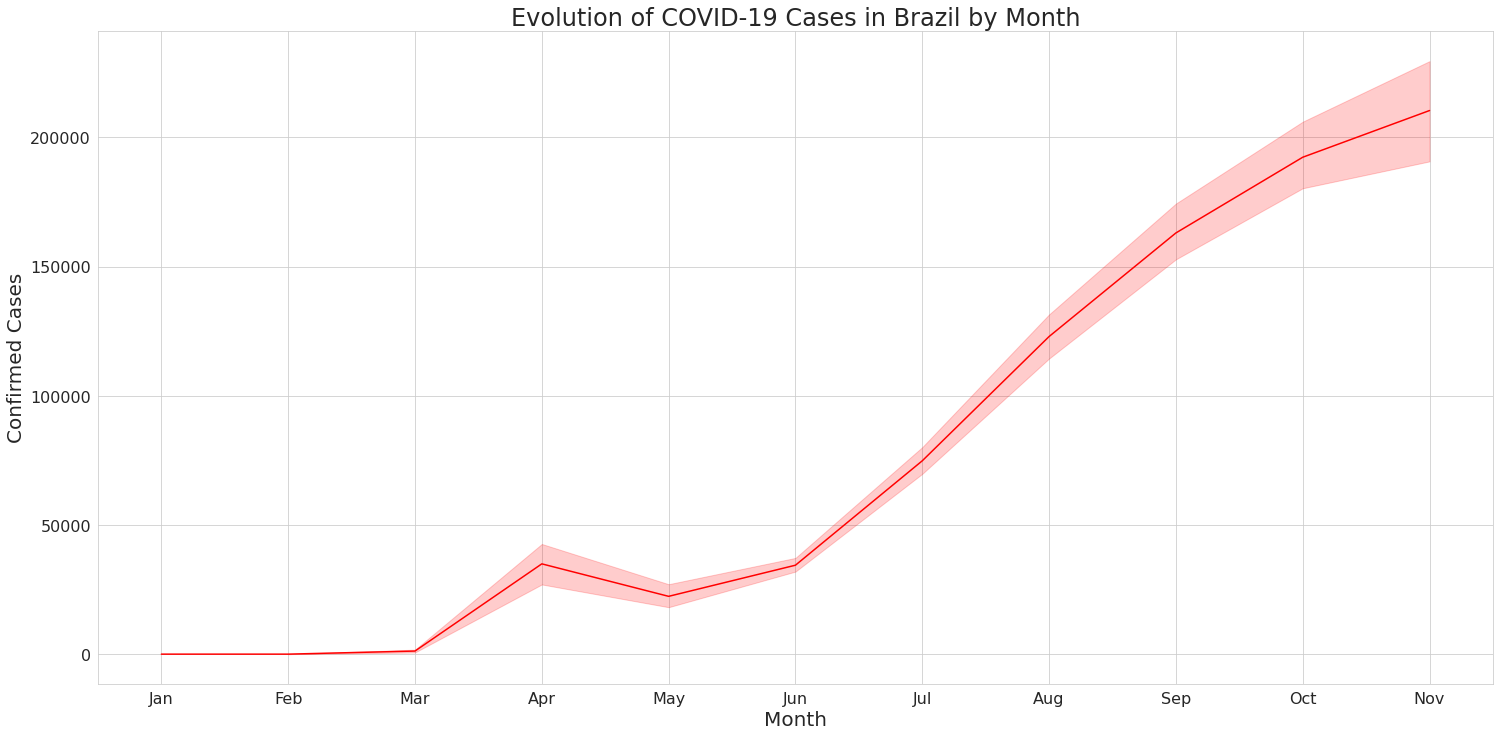

In [24]:
#Visualizing the data:
sns.set_style("whitegrid") 
sns.set_palette("Set1")
plt.figure(figsize=(25, 12))
sns.lineplot(data=df_brazil_sorted, x=df_brazil_sorted['month_name'], y=df_brazil_sorted['Confirmed'], color='red', sort=False, markers=True)
plt.title('Evolution of COVID-19 Cases in Brazil by Month', fontsize= 24)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Confirmed Cases', fontsize=20);

### Evolution over time

In [25]:
df_sum = df_brazil_sorted.groupby('ObservationDate').agg(
    {'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum', 'Active':'sum'}).reset_index()

In [26]:
df_sum.head()

,ObservationDate,Confirmed,Deaths,Recovered,Active
0,2020-01-23,0,0,0,0
1,2020-02-26,1,0,0,1
2,2020-02-27,1,0,0,1
3,2020-02-28,1,0,0,1
4,2020-02-29,2,0,0,2


In [27]:
df_sum.tail()

,ObservationDate,Confirmed,Deaths,Recovered,Active
260,2020-11-11,5747660,163368,5222937,361355
261,2020-11-12,5781582,164281,5254457,362844
262,2020-11-13,5810652,164737,5274812,371103
263,2020-11-14,5848959,165658,5279452,403849
264,2020-11-15,5863093,165798,5279452,417843


Text(0, 0.5, 'Total Number')

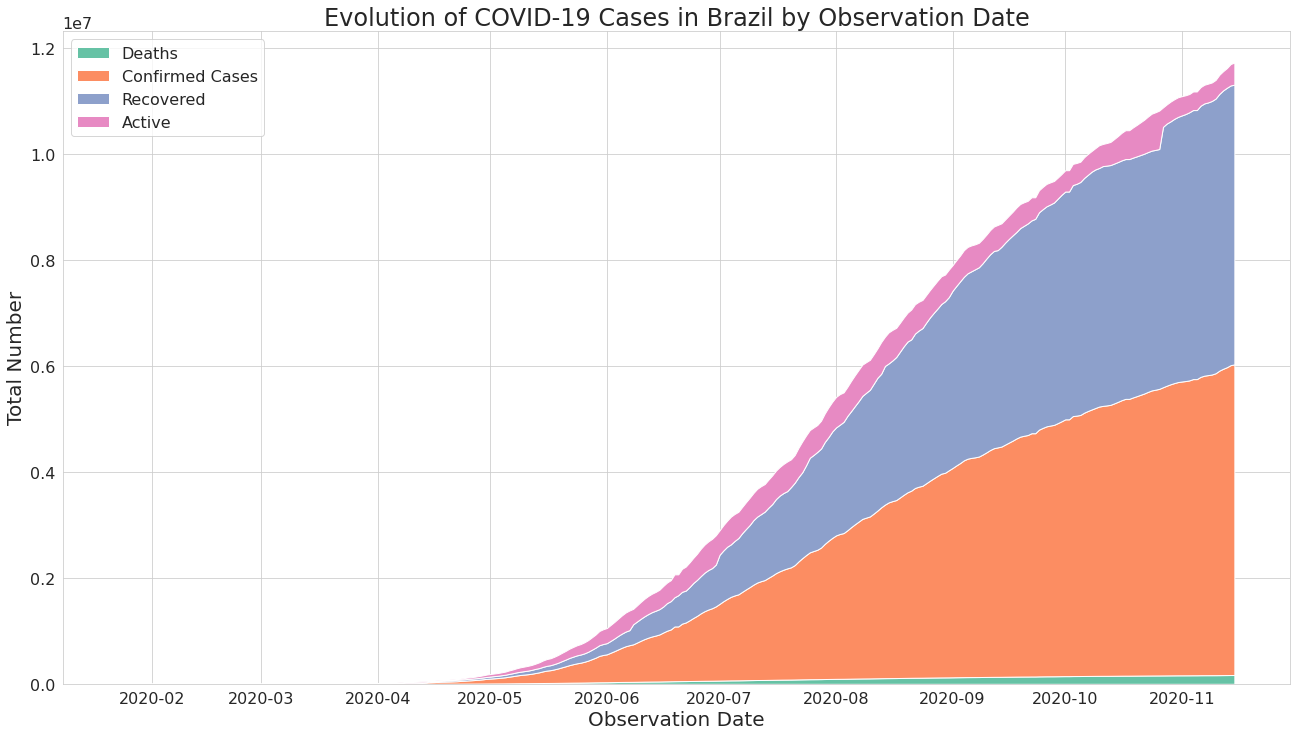

In [28]:
sns.set_palette("Set2")
#sns.set_style("darkgrid") 
#plt.style.use('dark_background')
sns.set_style("whitegrid") 

plt.figure(figsize=(22, 12))
plt.stackplot(df_sum['ObservationDate'], [df_sum['Deaths'],df_sum['Confirmed'], df_sum['Recovered'], df_sum['Active']],
              labels = ['Deaths', 'Confirmed Cases', 'Recovered', 'Active'])
plt.legend(loc = 'upper left', fontsize=16)
plt.title('Evolution of COVID-19 Cases in Brazil by Observation Date', fontsize= 24)
plt.xlabel('Observation Date', fontsize = 20)
plt.ylabel('Total Number', fontsize=20)


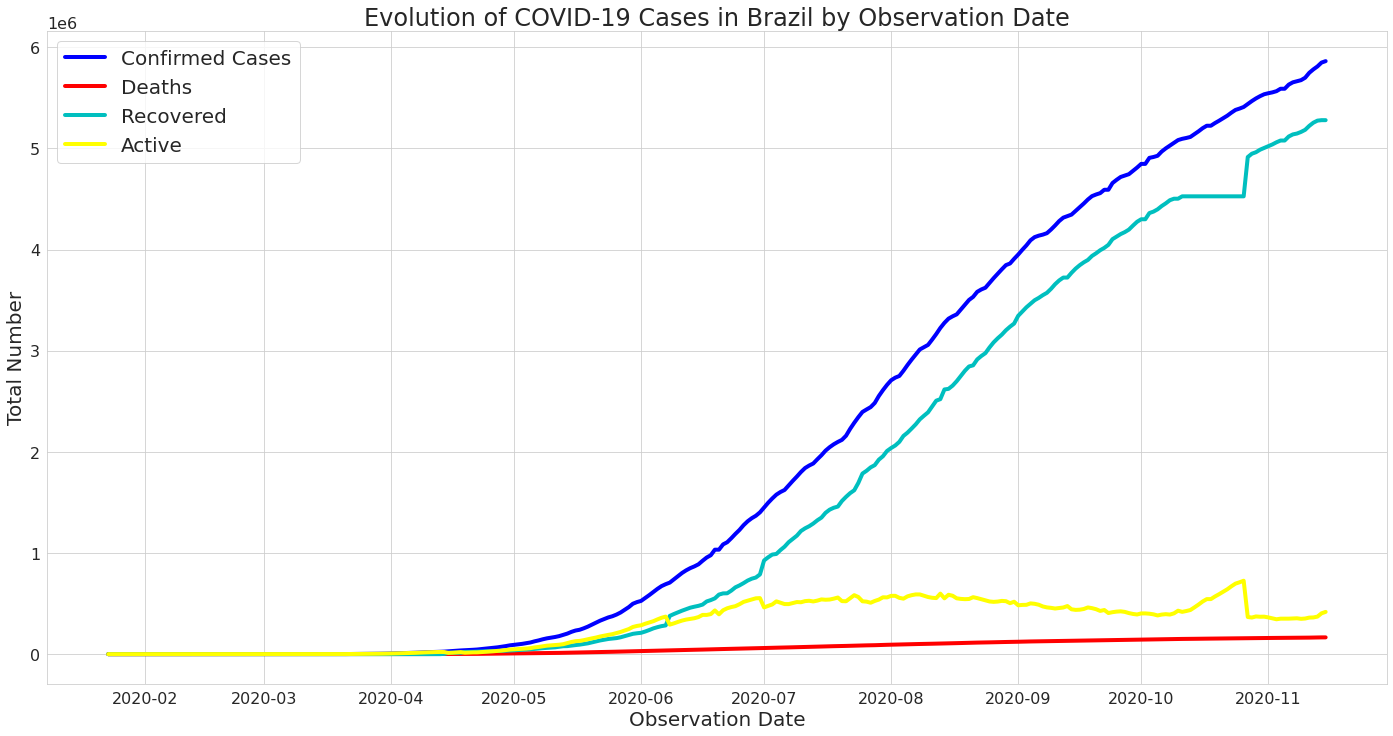

In [29]:
#sns.set_palette("Set1")
#sns.set_style("darkgrid") 
#plt.style.use('white_background')
sns.set_style("whitegrid") 
plt.figure(figsize = (24,12))
plt. plot(df_sum['ObservationDate'], df_sum['Confirmed'] , label = "Confirmed Cases", linewidth=4, color='blue')
plt. plot(df_sum['ObservationDate'], df_sum['Deaths'] , label = "Deaths", linewidth=4, color='red')
plt. plot(df_sum['ObservationDate'], df_sum['Recovered'] , label = "Recovered", linewidth=4, color='c')
plt. plot(df_sum['ObservationDate'], df_sum['Active'] , label = "Active", linewidth=4, color='yellow')
plt.title('Evolution of COVID-19 Cases in Brazil by Observation Date', fontsize= 24)
plt.xlabel('Observation Date', fontsize = 20)
plt.ylabel('Total Number', fontsize=20);
plt.legend(loc = 'upper left', fontsize=20);

## 4 -  Prediction Model

In [30]:
deaths_df = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')

In [31]:
deaths_df.shape

(269, 303)

In [32]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1554,1556,1558,1574,1577,1581,1591,1595,1605,1617
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,549,557,559,571,579,590,598,605,612,623
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2024,2036,2048,2062,2077,2093,2111,2124,2139,2154
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,300,303,307,308,308,312,315,317,322,322


In [33]:
deaths_df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,511,512,515,521,533,538,542,548,558,565
265,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,602,602,602,605,605,605,605,605,605,605
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,349,349,349,349,350,350,350,350,350,353
268,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,250,251,253,254,255,255,255,257,257,257


In [34]:
#Filtering the data for Brazil: 

deaths_df[deaths_df['Country/Region'] == 'Brazil']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
30,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,162015,162269,162397,162628,162802,163368,164281,164737,165658,165798


In [35]:
columns = deaths_df.keys()
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/6/20', '11/7/20', '11/8/20', '11/9/20', '11/10/20', '11/11/20',
       '11/12/20', '11/13/20', '11/14/20', '11/15/20'],
      dtype='object', length=303)

In [36]:
deaths_df = deaths_df.loc[:, columns[4]:columns[-1]]
deaths_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,0,0,0,0,0,0,0,0,0,0,...,1554,1556,1558,1574,1577,1581,1591,1595,1605,1617
1,0,0,0,0,0,0,0,0,0,0,...,549,557,559,571,579,590,598,605,612,623
2,0,0,0,0,0,0,0,0,0,0,...,2024,2036,2048,2062,2077,2093,2111,2124,2139,2154
3,0,0,0,0,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,76
4,0,0,0,0,0,0,0,0,0,0,...,300,303,307,308,308,312,315,317,322,322


In [37]:
deaths_df.keys()

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/6/20', '11/7/20', '11/8/20', '11/9/20', '11/10/20', '11/11/20',
       '11/12/20', '11/13/20', '11/14/20', '11/15/20'],
      dtype='object', length=299)

In [38]:
len(deaths_df.keys())

299

In [39]:
#Sum of death cases for 22nd of January - the first day on the dataset
deaths_df['1/22/20'].sum()

17

In [40]:
#Sum of death cases for the last day on the dataset
deaths_df['11/15/20'].sum()

1317139

Summing up the number of deaths per day

In [41]:
dates = deaths_df.keys()
y = []
for i in dates:
    
  y.append(deaths_df[i].sum())

In [42]:
len(y)

299

We have 299 dates so far

#### Preparing the dataset for the machine learning model:

Transforming y from a vector to a matrix:

In [43]:
y = np.array(y).reshape(-1,1)
y.shape

(299, 1)

In [44]:
X = np.arange(len(dates)).reshape(-1,1)
X.shape

(299, 1)

Now , creating a forecast matrix to predict death cases for the next 15 days, which means in this case, the rest of the month of November. 


In [45]:
fcast_mat = np.arange(len(dates) + 15).reshape(-1,1)
fcast_mat.shape

(314, 1)

Before the forecast matrix, we had 299 data points, now there are 314 data points as we included more 15 days to predict. 

#### Train and Test data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, shuffle = False)
#shuffle=4 because this is a time series prediction

### Linear Regression

In [47]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
score = regressor.score(X_train, y_train)
predictions_lin = regressor.predict(X_test)

In [48]:
mae = mean_absolute_error(y_test, predictions_lin)
regressor.score(X_test, y_test)

regressor.intercept_
len(regressor.coef_)

1

Comparing predictions with linear regression and test data:

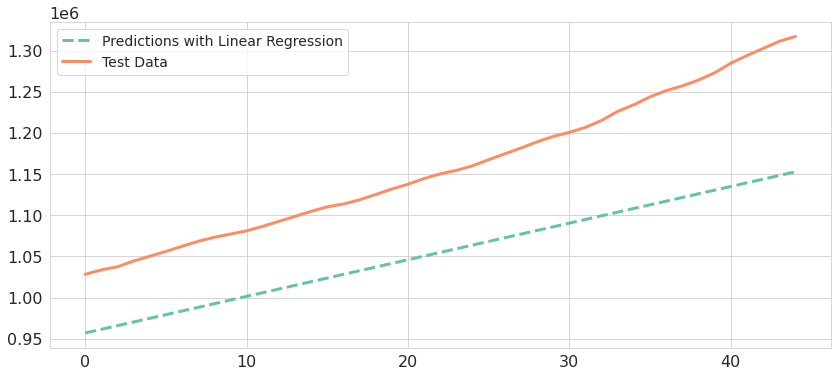

In [49]:
plt.figure(figsize=(14, 6))
plt.plot(predictions_lin, linestyle = 'dashed', linewidth=3, label='Predictions with Linear Regression')
plt.plot(y_test, linewidth=3, label = 'Test Data')
plt.legend(loc = 'upper left', fontsize=14);

In [50]:
print('MAE:', mean_absolute_error(predictions_lin, y_test))
print('RMSE:', np.sqrt(mean_absolute_error(predictions_lin, y_test)))

MAE: 103630.2528892443
RMSE: 321.91653093503027


### Polynomial Regression

In [51]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [52]:
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
score = regressor.score(X_train_poly, y_train)
poly_test_pred = regressor.predict(X_test_poly)

Comparing the values of y_test and poly_test_predict we can see that some values were predicted right and others not so much. To have an overview of the accuracy, let's plot both data (tested and predicted) to visualize the differences:

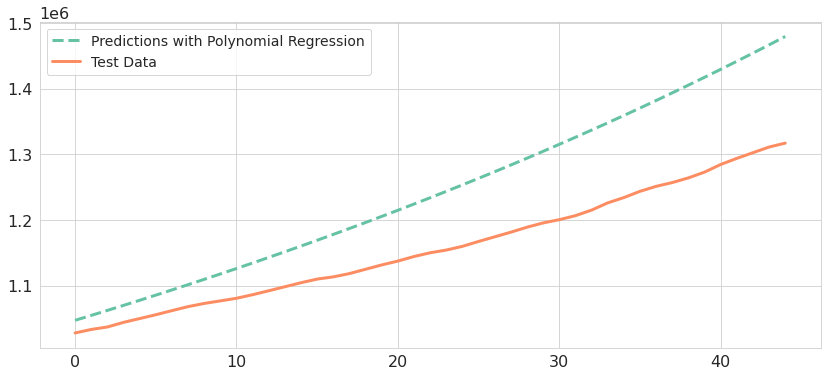

In [53]:
plt.figure(figsize=(14, 6))
plt.plot(poly_test_pred, linestyle = 'dashed', linewidth=3, label='Predictions with Polynomial Regression')
plt.plot(y_test,linewidth=3, label = 'Test Data')
plt.legend(loc = 'upper left', fontsize=14);

In [54]:
print('MAE:', mean_absolute_error(poly_test_pred, y_test))
print('RMSE:', np.sqrt(mean_absolute_error(poly_test_pred, y_test)))

MAE: 85806.57789677104
RMSE: 292.92759838699226


### Forecast Plot

In [55]:
X_train_all = poly.transform(fcast_mat)
X_train_all.shape

(314, 5)

In [56]:
poly_pred_all = regressor.predict(X_train_all)
len(poly_pred_all)

314

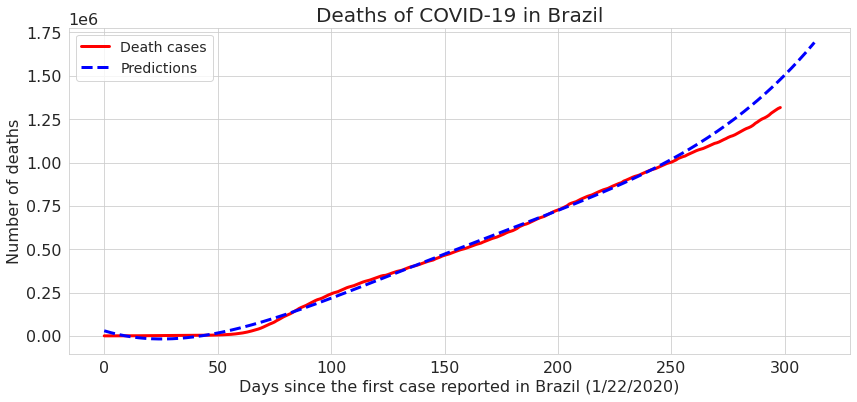

In [57]:
plt.figure(figsize=(14, 6))
plt.plot(fcast_mat[:-15], y, color='red', linewidth=3)
plt.plot(fcast_mat, poly_pred_all, color='blue', linestyle='dashed', linewidth=3)
plt.title('Deaths of COVID-19 in Brazil', fontsize=20)
plt.xlabel('Days since the first case reported in Brazil (1/22/2020)', fontsize=16)
plt.ylabel('Number of deaths', fontsize=16)
plt.legend(['Death cases', 'Predictions'], fontsize=14);

## Models comparison

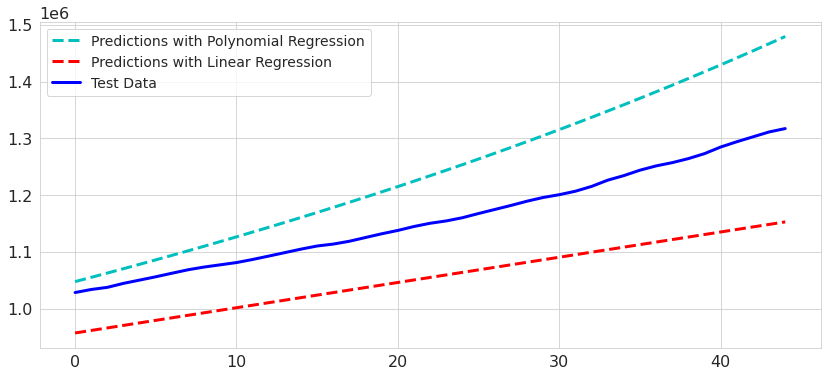

In [58]:
plt.figure(figsize=(14, 6))
plt.plot(poly_test_pred, linestyle = 'dashed', linewidth=3, label='Predictions with Polynomial Regression', color='c')
plt.plot(predictions_lin, linestyle = 'dashed', linewidth=3, label='Predictions with Linear Regression', color='red')
plt.plot(y_test,linewidth=3, label = 'Test Data', color='blue')
plt.legend(loc = 'upper left', fontsize=14);